In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math as m
from mpl_toolkits.mplot3d import Axes3D
from VerletSolver import VerletSolver as VS
#from Planet import Planet

In [19]:
class Planet():
    def __init__(self, name="Planet X", mass=1, coordinates=[1,0,0], velocity=[0,0,0]):
        self.mass = mass
        self.name = name
        self.coordinates = coordinates
        self.x = coordinates[0]
        self.y = coordinates[1]
        self.z = coordinates[2]
        self.velocity = velocity
        self.vx = velocity[0]
        self.vy = velocity[1]
        self.vz = velocity[2]
        self.r = self.orbit_radius()
        self.velocity_mag = (self.vx**2 + self.vy**2 + self.vz**2)**(0.5)
        self.position = (self.x,self.y,self.z)

    def orbit_radius(self):
        return (self.x**2+self.y**2+self.z**2)**(0.5)
    
    def gravitational_acceleration(self, other_planet, coord_index):
        difference = self.coordinates[coord_index]-other_planet.coordinates[coord_index]
        return -4*m.pi*self.mass*difference/((self.distance(other_planet))**3)
    
    def distance(self, other_planet):
        return ((self.x-other_planet.x)**2 + (self.y-other_planet.y)**2 + (self.z-other_planet.z)**2)**(0.5)
    
    def kinetic_energy(self):
        return (.5*self.mass*((self.vx)**2 + (self.vy)**2 + (selfv.z)**2))
    
    def potential_energy(self, other_planet):
        G=1
        return G*self.mass*other_planet.mass/(self.distance(other_planet))
        
    def angular_momentum(self, other_planet):
        return mass*self.distance(other_planet)*self.velocity_mag
    
    

In [51]:
#position -> velocity

#def positions(planet):
#
def plotter(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x,y,z,s=5)

    ax.set_xlabel('AU x-axis')
    ax.set_ylabel('AU y-axis')
    ax.set_zlabel('Au z-axis')
    

def planet_iterate(planet_lst):
    for p in planet_lst:
        for q in planet_lst:
            if p != q:
                print("Distance from {} to {} = {}".format(p.name, q.name, p.distance(q)))
                
                
def Solve(planet, years, h, n, pos_coordinates, velo_vectors, planet_lst):

    for j in range(len(pos_coordinates)):
        
        coord_array = pos_coordinates[j]
        velo_array = velo_vectors[j]
        #coord_array = np.zeros(n+1)
        #velo_array = np.zeros(n+1)
        coord_array[0] = planet.coordinates[j]
        velo_array[0] = planet.velocity[j]

        for i in range(n):
            
            #initialize variables
            c_i = coord_array[i]
            v_i = velo_array[i]

            #use VS to calculate acceleration, then position, then velocity
            a_i = VS.acceleration(c_i, planet.r)
            
            
            for p in planet_lst:
                if p.name != planet.name:
                    try:
                        a_i += p.gravitational_acceleration(p,j)
                    except ZeroDivisionError:
                        pass
                    
            c_i_1 = VS.coordinate(c_i,h,v_i,a_i)
            coord_array[i+1] = c_i_1
            a_i_1 = VS.acceleration(c_i_1, planet.r)
            v_i_1 = VS.velocity(v_i,h,a_i_1,a_i)
            velo_array[i+1] = v_i_1
            
            #update planet attributes
            planet.coordinates[j] = c_i_1
            planet.velocity[j] = v_i_1

        
mass_sun = 1.99E30
earth = Planet("Earth", 6.00*10**24/mass_sun,[-9.882510901700633E-01, 8.499778853173919E-02, -1.519972828171497E-04],
              [-1.680240369278054E-03, -1.719988462359221E-02, 4.349840395398017E-07])
sun = Planet("Sun", 1.00, [0.0,0.0,0.0],[0.0,0.0,0.0])
mercury = Planet("Mercury",1.65E-07,[2.80E-01,1.73E-01,-1.18E-02],[-2.01E-02,2.53E-02,3.91E-03])
venus = Planet("Venus", 2.45E-06, [-7.02E-02, 1.36E-01, 4.24E-02], [-3.81E-03, -1.99E-02, -5.40E-05])
earth = Planet("Earth", 3.0E-06,[-9.882510901700633E-01, 8.499778853173919E-02, -1.519972828171497E-04],
              [-1.680240369278054E-03, -1.719988462359221E-02, 4.349840395398017E-07])
mars = Planet("Mars", 3.3E-07, [7.78E-01, 1.28, 7.56E-03], [-1.14E-02, 8.47E-03, 4.58E-04])
jupiter = Planet('Jupiter', 0.00095, [-5.23, -1.53, 1.23E-01,2.02E-3, -6.88E-03, -1.67E-05])
saturn = Planet("Saturn", 0.000275, [-1.48,-9.93, 2.32E-01], [5.212E-03, -8.39E-04, -1.93E-04])
uranus = Planet("Uranus", 0.000044, [1.82E01, 8.08, -2.06E-01], [-1.62E-03, 3.41E-03, 3.38E-05])
neptune = Planet("Neptune", 0.0000515, [2.84E01, -9.47, -4.60E-01],[9.711E-04, 2.997E-03, -8.38E-05])
pluto = Planet("Pluto", 6.55E-09, [9.89, -3.18E01, 5.396E-01], [3.06E-03, 2.906E-04, -9.09E-04])
planet_vars = [sun, mercury, earth, mars, jupiter, saturn, uranus, neptune, pluto]
planet_vars = [earth, jupiter]

position_arrays = []
years = 3
h = 1/365
p = earth
n = int(years/h)
x_y_z = [np.zeros(n+1),np.zeros(n+1),np.zeros(n+1)]
vx_vy_vz = [np.zeros(n+1),np.zeros(n+1),np.zeros(n+1)]
x,y,z = x_y_z[0], x_y_z[1], x_y_z[2]

Solve(earth, years, h, n, x_y_z, vx_vy_vz, planet_vars)

print(x[:],y[:],z[:])

[-0.98825109 -0.98810565 -0.98766018 ..., -0.9692338  -0.96572469
 -0.96192233] [ 0.08499779  0.08493776  0.08485194 ...,  0.08282901  0.08248068
  0.0821073 ] [-0.000152   -0.00015197 -0.0001519  ..., -0.00014905 -0.00014851
 -0.00014792]


In [52]:
import copy
position_arrays = {}
years = 5
h = 1/365
n = int(years/h)

for p in planet_vars:
    blank_lst = [np.zeros(n+1),np.zeros(n+1),np.zeros(n+1)]
    x_y_z = copy.copy(blank_lst)

    vx_vy_vz = copy.copy(blank_lst)
    x,y,z = x_y_z[0], x_y_z[1], x_y_z[2]
    Solve(p, years, h, n, x_y_z, vx_vy_vz, planet_vars)
    print(x_y_z[0])

    position_arrays[p] = [x,y,z]
    
    

[  1.44116563e+00   1.28123222e+00   1.13904743e+00 ...,   1.06870454e-93
   9.50105019e-94   8.44667082e-94]
[ nan  nan  nan ...,  nan  nan  nan]


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [45]:
position_arrays.values()

dict_values([[array([  1.44116563e+00,   1.28123222e+00,   1.13904743e+00, ...,
         1.06870454e-93,   9.50105019e-94,   8.44667082e-94]), array([ -1.40833444e-01,  -1.25204448e-01,  -1.11309880e-01, ...,
        -1.04435839e-94,  -9.28460679e-95,  -8.25424724e-95]), array([  2.22332389e-04,   1.97659045e-04,   1.75723826e-04, ...,
         1.64871844e-97,   1.46575185e-97,   1.30308999e-97])], [array([ nan,  nan,  nan, ...,  nan,  nan,  nan]), array([ nan,  nan,  nan, ...,  nan,  nan,  nan]), array([ nan,  nan,  nan, ...,  nan,  nan,  nan])]])

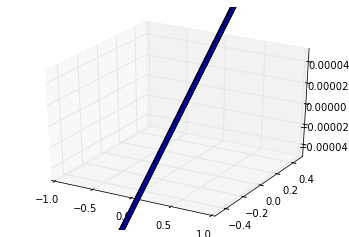

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=x,ys=y,zs=z)
ax.set_xlim(left=-1, right=1)
ax.set_ylim(bottom=-.5,top=.5)
ax.set_zlim(bottom=-.00005,top=.00005)
ax.mouse_init()

#ax.view_init(45, 45)
#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

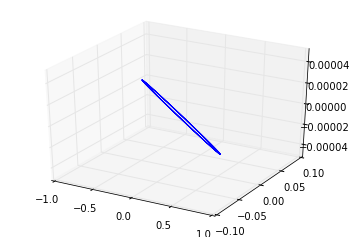

In [9]:
fig = plt.figure()

ax = fig.gca(projection='3d')

ax.plot(xs=x,ys=y)
ax.mouse_init()
ax.set_xlim(left=-1, right=1)
ax.set_ylim(bottom=-.1,top=.1)
ax.set_zlim(bottom=-.00005,top=.00005)

plt.show()